## Final Project Submission

Please fill out:
* Student name: Alisa Radjabova
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Rafael Carrasco
* Blog post URL:


          Importing all needed libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob
import sqlite3

    Decompressed all the csv files with 'gunzip' in terminal
<br>
        
            Select only the csv files to work with

In [2]:
csv_files = glob('zippedData/*.csv')
csv_files

['zippedData/tmdb.movies.csv',
 'zippedData/imdb.title.crew.csv',
 'zippedData/tn.movie_budgets.csv',
 'zippedData/imdb.title.ratings.csv',
 'zippedData/imdb.name.basics.csv',
 'zippedData/imdb.title.principals.csv',
 'zippedData/imdb.title.akas.csv',
 'zippedData/bom.movie_gross.csv',
 'zippedData/imdb.title.basics.csv']

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

         Put all the files into a dictonary for easier access
                        Renamed to easier names
                                

In [4]:
files_dict = {}
for file in csv_files:
    file_cleaned = os.path.basename(file).replace(".csv", "").replace(".", "_")
    file_df = pd.read_csv(file)
    files_dict[file_cleaned] = file_df

In [5]:
files_dict.keys()

dict_keys(['tmdb_movies', 'imdb_title_crew', 'tn_movie_budgets', 'imdb_title_ratings', 'imdb_name_basics', 'imdb_title_principals', 'imdb_title_akas', 'bom_movie_gross', 'imdb_title_basics'])

In [6]:
files_dict.values()

dict_values([       Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1         

                                                    .
                                                    .
                                                    .
                                                    .
                                                    .
                        EXPLORING DATAFRAMES WITH GENRES
                                                    .
                                                    .
                                                    .
                                                    .
                                                    .

In [7]:
files_dict['tn_movie_budgets'].release_date = pd.to_datetime(files_dict['tn_movie_budgets'].release_date)
files_dict['tn_movie_budgets'].drop('id', axis=1, inplace=True)
files_dict['tn_movie_budgets'].production_budget = files_dict['tn_movie_budgets'].production_budget.str.replace('$','').str.replace(',', '').astype(float)
files_dict['tn_movie_budgets'].domestic_gross = files_dict['tn_movie_budgets'].domestic_gross.str.replace('$','').str.replace(',', '').astype(float)
files_dict['tn_movie_budgets'].worldwide_gross = files_dict['tn_movie_budgets'].worldwide_gross.str.replace('$','').str.replace(',', '').astype(float)


In [8]:
files_dict['tn_movie_budgets']['profit_margin_domestic'] = (files_dict['tn_movie_budgets']['domestic_gross'] - files_dict['tn_movie_budgets']['production_budget']) / files_dict['tn_movie_budgets']['domestic_gross']
files_dict['tn_movie_budgets']['profit_margin_worldwide'] = (files_dict['tn_movie_budgets']['worldwide_gross'] - files_dict['tn_movie_budgets']['production_budget']) / files_dict['tn_movie_budgets']['worldwide_gross']
files_dict['tn_movie_budgets']['monthly_release'] = files_dict['tn_movie_budgets']['release_date'].apply(lambda x: x.strftime('%m'))
files_dict['tn_movie_budgets']['day_release'] = files_dict['tn_movie_budgets']['release_date'].apply(lambda x: x.strftime('%A'))
files_dict['tn_movie_budgets'].info()
files_dict['tn_movie_budgets'].head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
release_date               5782 non-null datetime64[ns]
movie                      5782 non-null object
production_budget          5782 non-null float64
domestic_gross             5782 non-null float64
worldwide_gross            5782 non-null float64
profit_margin_domestic     5782 non-null float64
profit_margin_worldwide    5782 non-null float64
monthly_release            5782 non-null object
day_release                5782 non-null object
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 406.7+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_domestic,profit_margin_worldwide,monthly_release,day_release
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,0.441163,0.846921,12,Friday
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-0.703283,0.607331,05,Friday


In [9]:
files_dict['imdb_title_basics'].genres = files_dict['imdb_title_basics'].genres.str.split(',')
files_dict['imdb_title_basics'].drop(['original_title', 'start_year'], axis=1, inplace=True)
files_dict['imdb_title_basics'].info()
files_dict['imdb_title_basics'].head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 4 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), object(3)
memory usage: 4.5+ MB


,tconst,primary_title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,114.0,"[Biography, Drama]"


In [79]:
df_genresx = files_dict['imdb_title_basics'].join(files_dict['imdb_title_ratings'], lsuffix='_other')
df_genres = df_genresx.join(files_dict['tn_movie_budgets'], rsuffix='_other')
df_genres.drop(['tconst_other', 'runtime_minutes', 'primary_title', 'release_date'], axis=1, inplace=True)
df_genres.dropna(inplace=True)
print(df_genres.shape)
print(df_genres.info())
df_genres.head(3)

(5256, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5781
Data columns (total 12 columns):
genres                     5256 non-null object
tconst                     5256 non-null object
averagerating              5256 non-null float64
numvotes                   5256 non-null float64
movie                      5256 non-null object
production_budget          5256 non-null float64
domestic_gross             5256 non-null float64
worldwide_gross            5256 non-null float64
profit_margin_domestic     5256 non-null float64
profit_margin_worldwide    5256 non-null float64
monthly_release            5256 non-null object
day_release                5256 non-null object
dtypes: float64(7), object(5)
memory usage: 533.8+ KB
None


,genres,tconst,averagerating,numvotes,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_domestic,profit_margin_worldwide,monthly_release,day_release
0,"[Action, Crime, Drama]",tt10356526,8.3,31.0,Avatar,425000000.0,760507625.0,2.776345e+09,0.441163,0.846921,12,Friday
1,"[Biography, Drama]",tt10384606,8.9,559.0,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-0.703283,0.607331,05,Friday
2,[Drama],tt1042974,6.4,20.0,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-7.184770,-1.337036,06,Friday


In [102]:
df_genres = df_genres.sort_values(['profit_margin_worldwide'], ascending=False)

all_genres = []
for genres in df_genres.genres[:200]:
    for genre in genres:
        all_genres.append(genre)

all_genres
# Create list of unique genres

proMargin_genre_count = {}
for genre in all_genres:
    proMargin_genre_count[genre] = all_genres.count(genre)

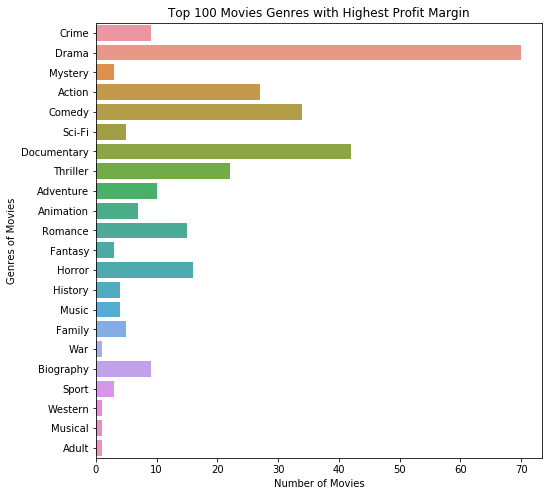

In [104]:
x = []
y = []
for genre, value in proMargin_genre_count.items():
    x.append(genre)
    y.append(value)

plt.figure(figsize=(8,8))
sns.barplot(y, x)
plt.title("Top 100 Movies Genres with Highest Profit Margin")
plt.ylabel("Genres of Movies")
plt.xlabel("Number of Movies")
plt.show()

In [93]:
df_genres = df_genres.sort_values(['averagerating', 'numvotes'], ascending=False)

all_genres = []
for genres in df_genres.genres[:200]:
    for genre in genres:
        all_genres.append(genre)

all_genres
# Create list of unique genres

rating_genre_count = {}
for genre in all_genres[:100]:
    rating_genre_count[genre] = all_genres.count(genre)

In [95]:
rating_genre_count

{'Comedy': 37,
 'Drama': 72,
 'Adventure': 9,
 'Documentary': 63,
 'Thriller': 22,
 'Sport': 1,
 'Action': 19,
 'Mystery': 6,
 'Music': 4,
 'Animation': 4,
 'Musical': 3,
 'Crime': 11,
 'Adult': 1,
 'Biography': 11,
 'History': 4,
 'Sci-Fi': 3,
 'Fantasy': 4,
 'Family': 7,
 'Horror': 6}

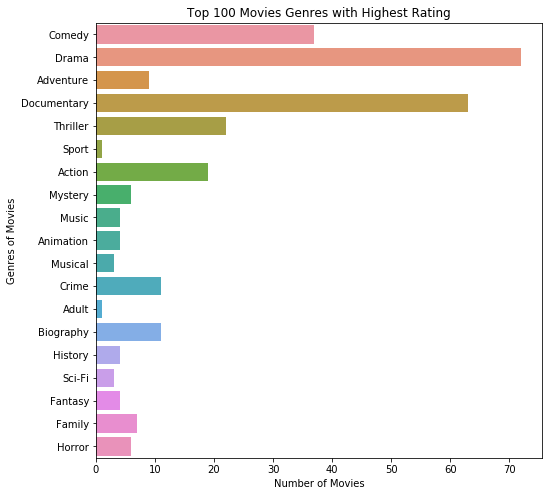

In [94]:
x = []
y = []
for genre, value in rating_genre_count.items():
    x.append(genre)
    y.append(value)

plt.figure(figsize=(8,8))
sns.barplot(y, x)
plt.title("Top 100 Movies Genres with Highest Rating")
plt.ylabel("Genres of Movies")
plt.xlabel("Number of Movies")
plt.show()

In [98]:
df_genres = df_genres.sort_values(['worldwide_gross'], ascending=False)

all_genres = []
for genres in df_genres.genres[:200]:
    for genre in genres:
        all_genres.append(genre)

all_genres
# Create list of unique genres

gross_genre_count = {}
for genre in all_genres:
    gross_genre_count[genre] = all_genres.count(genre)

In [101]:
gross_genre_count


{'Action': 29,
 'Crime': 21,
 'Drama': 97,
 'Family': 5,
 'Comedy': 46,
 'Horror': 18,
 'Thriller': 26,
 'Adventure': 30,
 'Fantasy': 13,
 'Mystery': 12,
 'Documentary': 27,
 'Biography': 13,
 'Sport': 3,
 'Romance': 18,
 'Animation': 15,
 'Sci-Fi': 7,
 'War': 4,
 'Adult': 1,
 'History': 8,
 'Western': 1,
 'Music': 3,
 'Musical': 1}

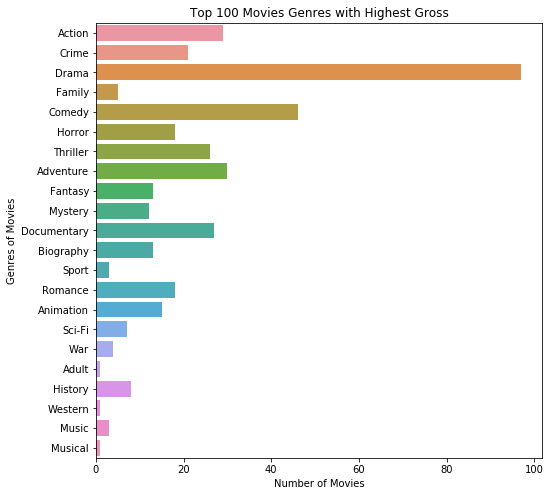

In [100]:
x = []
y = []
for genre, value in gross_genre_count.items():
    x.append(genre)
    y.append(value)

plt.figure(figsize=(8,8))
sns.barplot(y, x)
plt.title("Top 100 Movies Genres with Highest Gross")
plt.ylabel("Genres of Movies")
plt.xlabel("Number of Movies")
plt.show()

                                                    .
                                                    .
                                                    .
                                                    .
                                                    .
                        EXPLORING DATAFRAMES WITH DIRECTORS
                                                    .
                                                    .
                                                    .
                                                    .
                                                    .

In [14]:
files_dict['imdb_title_crew'].drop('writers', axis=1, inplace=True)
files_dict['imdb_title_crew'].directors = files_dict['imdb_title_crew'].directors.str.split(',').str[0]
files_dict['imdb_title_crew'].info()
files_dict['imdb_title_crew'].head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 2 columns):
tconst       146144 non-null object
directors    140417 non-null object
dtypes: object(2)
memory usage: 2.2+ MB


,tconst,directors
0,tt0285252,nm0899854
1,tt0438973,NaN


In [168]:
df_dir = files_dict['tn_movie_budgets'].join(files_dict['imdb_title_crew'], lsuffix='_other')
df_dir.dropna(inplace=True)
df_dir.drop(df_dir[df_dir.worldwide_gross == 0]. index, inplace=True)
top_dir = df_dir.sort_values('profit_margin_domestic', ascending=False)[:25]


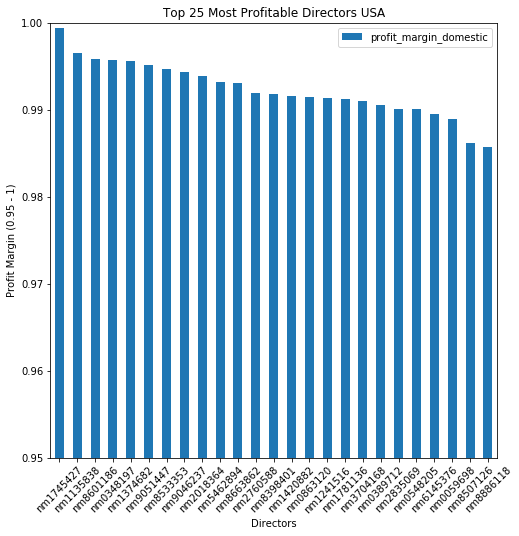

In [183]:
top_dir.plot(kind='bar', y="profit_margin_domestic", x="directors", figsize=(8,8))
plt.title("Top 25 Most Profitable Directors USA")
plt.xlabel("Directors")
plt.xticks(rotation=45)
plt.ylabel("Profit Margin (0.95 - 1)")
plt.ylim(.95, 1)

plt.show()

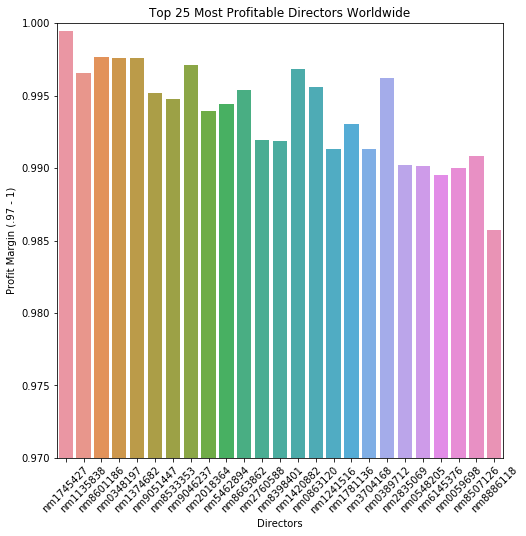

In [187]:
plt.figure(figsize=(8, 8))
sns.barplot(y="profit_margin_worldwide", x="directors", data=top_dir)
plt.title("Top 25 Most Profitable Directors Worldwide")
plt.ylim(.97, 1)
plt.xticks(rotation=45)
plt.xlabel("Directors")
plt.ylabel("Profit Margin (.97 - 1)")
plt.show()

                                                    .
                                                    .
                                                    .
                                                    .
                                                    .
                           EXPLORING DATAFRAMES WITH POPULARITY
                                                    .
                                                    .
                                                    .
                                                    .
                                                    .

In [18]:
files_dict['tmdb_movies'].drop(['Unnamed: 0', 'genre_ids', 'id', 'original_title'], axis=1, inplace=True)
files_dict['tmdb_movies'].release_date = pd.to_datetime(files_dict['tmdb_movies'].release_date)
files_dict['tmdb_movies']['monthly_release'] = files_dict['tmdb_movies']['release_date'].apply(lambda x: x.strftime('%m'))
files_dict['tmdb_movies']['day_release'] = files_dict['tmdb_movies']['release_date'].apply(lambda x: x.strftime('%A'))

In [19]:
top_movie_profit = df_dir.sort_values("profit_margin_domestic", ascending=False)[:25]
top_movie_profit.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_domestic,profit_margin_worldwide,monthly_release,day_release,tconst,directors
5745,1972-06-30,Deep Throat,25000.0,45000000.0,45000000.0,0.999444,0.999444,06,Friday,tt7068818,nm1745427
5773,1993-02-26,El Mariachi,7000.0,2040920.0,2041928.0,0.996570,0.996572,02,Friday,tt7385582,nm1135838


In [20]:
pop_dir_df = files_dict['tmdb_movies'].join(df_dir, lsuffix="_other", how='inner')
pop_dir_df.drop(['tconst', 'original_language', 'release_date_other', 'monthly_release_other', 'movie', "day_release_other"], axis=1, inplace=True)
top_bud_pop = pop_dir_df.sort_values("production_budget", ascending=False)

In [21]:
top_vote_v_count = df_genres.sort_values(['numvotes', 'averagerating'], ascending=False)[:25]
top_vote_v_count.head(2)

,genres,tconst,averagerating,numvotes,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_domestic,profit_margin_worldwide,monthly_release,day_release
3140,[Documentary],tt1130884,8.1,1005960.0,Things to Do in Denver when You're Dead,15000000.0,529766.0,529766.0,-27.314388,-27.314388,12,Friday
3195,[Comedy],tt1392190,8.1,780910.0,Vampire in Brooklyn,14000000.0,19637147.0,19637147.0,0.287065,0.287065,10,Friday


In [22]:
top_vote_avg = pop_dir_df.sort_values(['vote_count', 'vote_average'], ascending=False)[:25]
top_vote_avg.head(2)

,popularity,title,vote_average,vote_count,release_date,production_budget,domestic_gross,worldwide_gross,profit_margin_domestic,profit_margin_worldwide,monthly_release,day_release,directors
4,27.920,Inception,8.3,22186,2017-12-15,317000000.0,620181382.0,1.316722e+09,0.488859,0.759251,12,Friday,nm0089502
5179,50.289,The Avengers,7.6,19673,2008-12-31,1200000.0,0.0,8.133800e+04,-inf,-13.753252,12,Wednesday,nm7278299


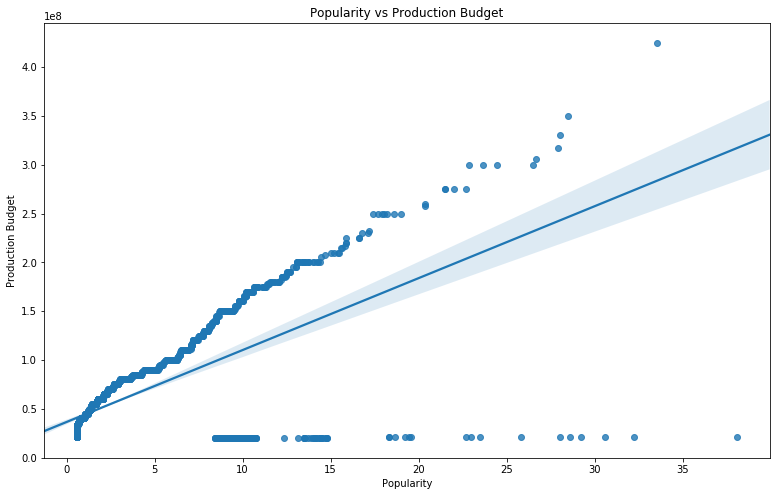

In [199]:
plt.figure(figsize=(13, 8))
sns.regplot(x='popularity', y='production_budget', data=top_bud_pop[:2500])
plt.title("Popularity vs Production Budget")
plt.xlabel("Popularity")
plt.ylabel("Production Budget")
plt.show()

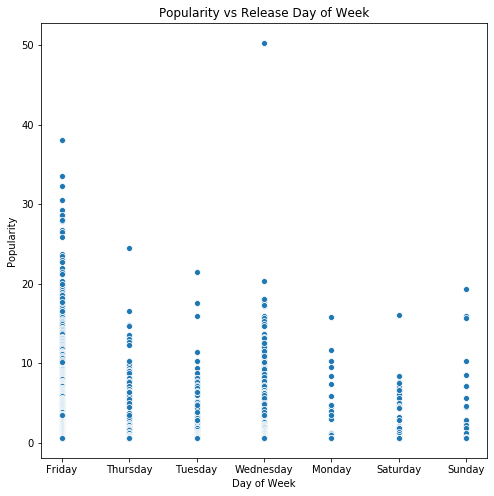

In [25]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='day_release', y='popularity', data=pop_dir_df)
plt.title("Popularity vs Release Day of Week")
plt.xlabel("Day of Week")
plt.ylabel('Popularity')
plt.show()


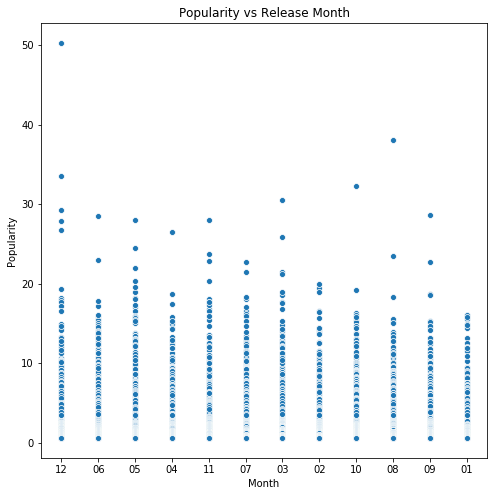

In [197]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='monthly_release', y='popularity', data=pop_dir_df)
plt.title("Popularity vs Release Month")
plt.xlabel("Month")
plt.ylabel('Popularity')
plt.show()


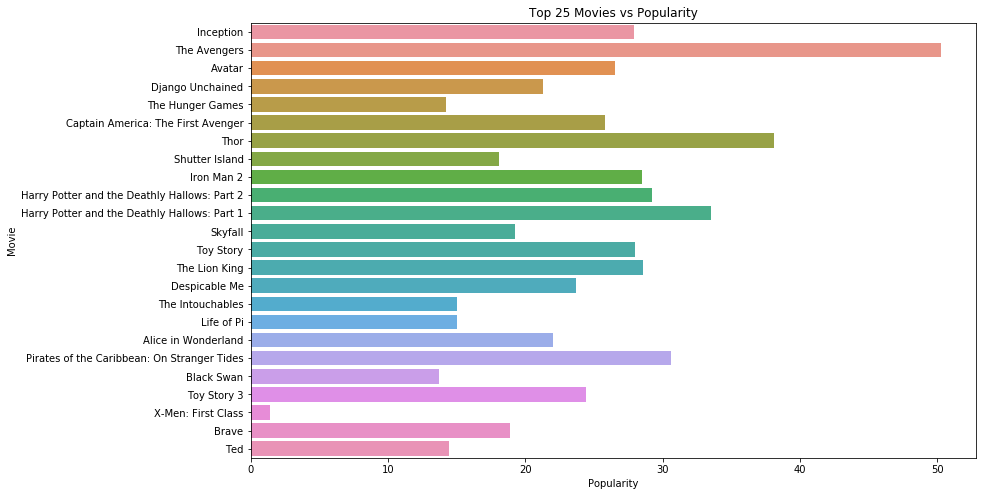

In [193]:
plt.figure(figsize=(13, 8))
sns.barplot(x='popularity', y='title', data=top_vote_avg)
plt.title("Top 25 Movies vs Popularity")
plt.xlabel("Popularity")
plt.ylabel("Movie")
plt.show()

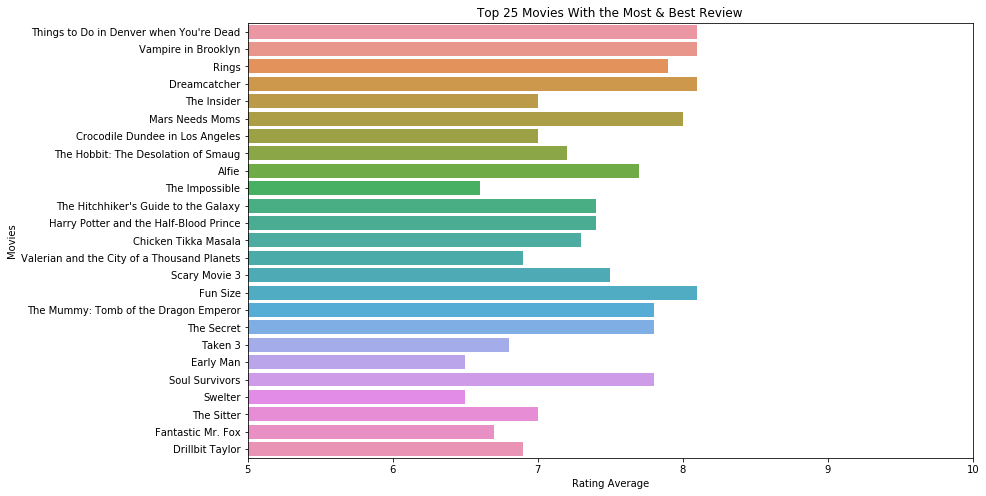

In [209]:
plt.figure(figsize=(13, 8))
sns.barplot(y='movie', x='averagerating', data=top_vote_v_count)
plt.title('Top 25 Movies With the Most & Best Review')
plt.ylabel('Movies')
plt.xlabel('Rating Average')
plt.xlim([5,10])
plt.show()

                                                    .
                                                    .
                                                    .
                                                    .
                                                    .
                            EXPLORING DATAFRAMES WITH MONEY
                                                    .
                                                    .
                                                    .
                                                    .
                                                    .

In [28]:
df_money = files_dict['tn_movie_budgets'].sort_values("profit_margin_worldwide", ascending=False)
df_money.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_domestic,profit_margin_worldwide,monthly_release,day_release
5745,1972-06-30,Deep Throat,25000.0,45000000.0,45000000.0,0.999444,0.999444,06,Friday
5613,1980-03-21,Mad Max,200000.0,8750000.0,99750000.0,0.977143,0.997995,03,Friday


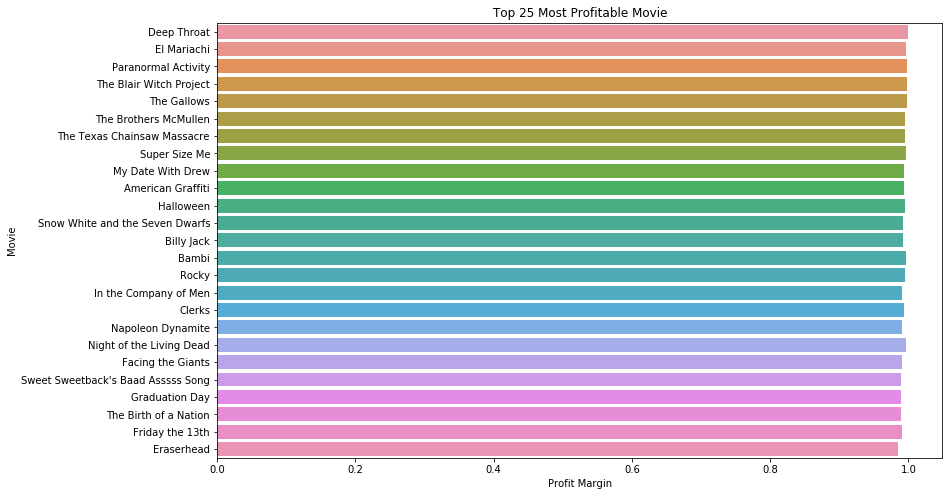

In [214]:
plt.figure(figsize=(13,8))
sns.barplot(y='movie', x='profit_margin_worldwide', data=top_movie_profit)
plt.title("Top 25 Most Profitable Movie")
plt.xlabel("Profit Margin")
plt.ylabel("Movie")
plt.show()

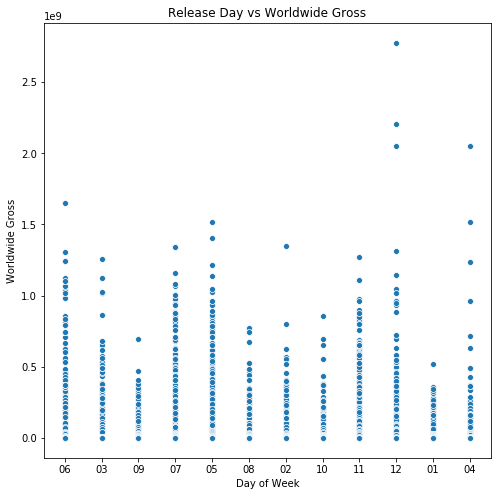

In [30]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='monthly_release', y='worldwide_gross', data=df_money)
plt.title("Release Day vs Worldwide Gross")
plt.xlabel("Day of Week")
plt.ylabel('Worldwide Gross')
plt.show()


In [31]:
x = df_money.loc[df_money.worldwide_gross == 0].index
money_rev_df = df_money.drop(x)

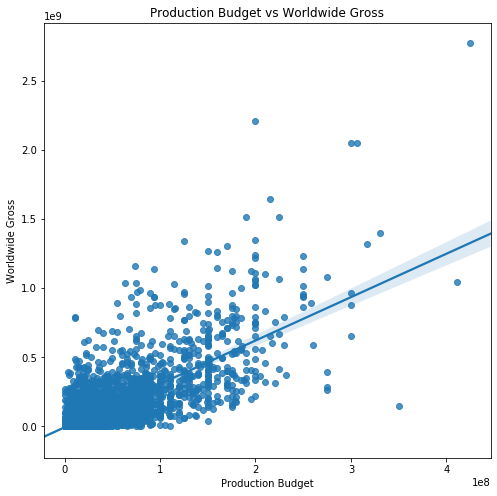

In [210]:
plt.figure(figsize=(8,8))
sns.regplot(x='production_budget', y='worldwide_gross', data=money_rev_df)
plt.title("Production Budget vs Worldwide Gross")
plt.xlabel("Production Budget")
plt.ylabel('Worldwide Gross')
plt.show()